In [1]:
from fastbook import *
import seaborn as sns

from tools.toolbox import *
from tools.dataset import Data

In [2]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [3]:
df = Data.get_g12d_IC50()

In [39]:
df = pd.read_csv('dedup_IC50.csv')

In [40]:
df

,ID,SMILES,IC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,722.90
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,434.10
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1867.30
...,...,...,...
643,646_55,OC=1C=C(C2=CC=CC=C2C1)N1CC=2N=C(N=C(C2CC1)N1C[C@@H]2C[C@@H]([C@H](C1)N2)O)OC[C@H]2N(CCC2)C,273.20
644,646_18,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3[C@H](CC2)COC(NC)=O)CN(CC1)C1=CC=CC2=CC=CC(=C12)CC,1.80
645,646_122,C(C)C2=C1C(=CC=CC1=CC=C2)N8CC3=C(C(=NC(=N3)OC[C@@]45CCCN4C[C@@H](C5)F)[C@@H]6C[C@@H]7CC[C@H](C6)N7)CC8,121.45
646,646_117,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)CN(CC1)C1=CC(=CC2=CC=CC(=C12)Cl)O,0.60


In [35]:
t = tanimoto(df)

In [37]:
t.query('SimilarityScore ==1')

,ID1,ID2,SMILES1,SMILES2,SimilarityScore
0,646_54,646_55,OC=1C=C(C2=CC=CC=C2C1)N1CC=2N=C(N=C(C2CC1)N1C[C@H]2C[C@H]([C@@H](C1)N2)O)OC[C@H]2N(CCC2)C,OC=1C=C(C2=CC=CC=C2C1)N1CC=2N=C(N=C(C2CC1)N1C[C@@H]2C[C@@H]([C@H](C1)N2)O)OC[C@H]2N(CCC2)C,1.0
1,US_287,US_289,C[C@H]1C[C@H]1c1ccccc1-c1ncc2c(nc(OCC34CCCN3CCC4)nc2c1F)N1CC2CCC(C1)N2,C[C@H]1C[C@@H]1c1ccccc1-c1ncc2c(nc(OCC34CCCN3CCC4)nc2c1F)N1CC2CCC(C1)N2,1.0
2,US_467,US_452,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)C(=C(N=C1)C=1C=C(C=C(C1[C@@H]1[C@@H](C1)C)Cl)O)F,C[C@@H]1C[C@H]1c1c(Cl)cc(O)cc1-c1ncc2c(nc(OC[C@@]34CCCN3C[C@H](F)C4)nc2c1F)N1CC2CCC(C1)N2,1.0
3,paper_24,US_326,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@@]56N(C[C@@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,Oc1cc(-c2ncc3c(nc(OC[C@]45CCCN4C[C@@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1.0
4,US_327,paper_24,Oc1cc(-c2ncc3c(nc(OC[C@@]45CCCN4C[C@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@@]56N(C[C@@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1.0
5,US_327,US_326,Oc1cc(-c2ncc3c(nc(OC[C@@]45CCCN4C[C@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,Oc1cc(-c2ncc3c(nc(OC[C@]45CCCN4C[C@@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1.0
6,US_461,paper_20,[C@@H]12OC[C@@H](N(C1)CCOC=1N=C(C3=C(N1)C(=C(N=C3)C3=CC(=CC1=CC=CC=C31)O)F)N3C[C@H]1CC[C@@H](C3)N1)C2,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCCN5[C@@H](C6)CO[C@@H]6C5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1.0
7,paper_25,paper_24,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@]56N(C[C@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@@]56N(C[C@@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,1.0
8,paper_25,US_326,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@]56N(C[C@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,Oc1cc(-c2ncc3c(nc(OC[C@]45CCCN4C[C@@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1.0
9,paper_25,US_327,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OC[C@]56N(C[C@H](F)C6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,Oc1cc(-c2ncc3c(nc(OC[C@@]45CCCN4C[C@H](F)C5)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1.0


In [41]:
from tools.feature import *

In [42]:
smi_feat = smi2prop(df,'SMILES','ID',True,True)

In [43]:
df = df.query('IC50<10000').reset_index(drop=True)

In [44]:
df

,ID,SMILES,IC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,722.90
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,434.10
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1867.30
...,...,...,...
624,646_55,OC=1C=C(C2=CC=CC=C2C1)N1CC=2N=C(N=C(C2CC1)N1C[C@@H]2C[C@@H]([C@H](C1)N2)O)OC[C@H]2N(CCC2)C,273.20
625,646_18,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3[C@H](CC2)COC(NC)=O)CN(CC1)C1=CC=CC2=CC=CC(=C12)CC,1.80
626,646_122,C(C)C2=C1C(=CC=CC1=CC=C2)N8CC3=C(C(=NC(=N3)OC[C@@]45CCCN4C[C@@H](C5)F)[C@@H]6C[C@@H]7CC[C@H](C6)N7)CC8,121.45
627,646_117,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)CN(CC1)C1=CC(=CC2=CC=CC(=C12)Cl)O,0.60


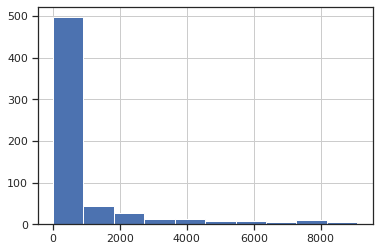

In [45]:
df['IC50'].hist();

In [46]:
df.IC50.sort_values()

235       0.1
45        0.4
278       0.4
369       0.4
198       0.4
        ...  
213    8304.2
44     8407.4
63     8694.9
117    8846.4
446    9092.3
Name: IC50, Length: 629, dtype: float64

In [47]:
df['IC50'].apply(lambda x: np.log10(x)).sort_values()

235   -1.000000
45    -0.397940
278   -0.397940
369   -0.397940
198   -0.397940
         ...   
213    3.919298
44     3.924662
63     3.939265
117    3.946767
446    3.958674
Name: IC50, Length: 629, dtype: float64

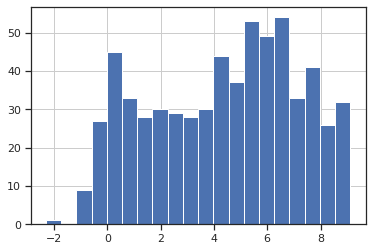

In [48]:
df['IC50'].apply(lambda x: np.log(x)).hist(bins=20);

In [49]:
df['log_IC50'] = df['IC50'].apply(lambda x: np.log(x))

In [50]:
df

,ID,SMILES,IC50,log_IC50
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70,4.825911
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20,6.206979
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,722.90,6.583271
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,434.10,6.073275
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,1867.30,7.532249
...,...,...,...,...
624,646_55,OC=1C=C(C2=CC=CC=C2C1)N1CC=2N=C(N=C(C2CC1)N1C[C@@H]2C[C@@H]([C@H](C1)N2)O)OC[C@H]2N(CCC2)C,273.20,5.610204
625,646_18,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@@]23CCCN3[C@H](CC2)COC(NC)=O)CN(CC1)C1=CC=CC2=CC=CC(=C12)CC,1.80,0.587787
626,646_122,C(C)C2=C1C(=CC=CC1=CC=C2)N8CC3=C(C(=NC(=N3)OC[C@@]45CCCN4C[C@@H](C5)F)[C@@H]6C[C@@H]7CC[C@H](C6)N7)CC8,121.45,4.799503
627,646_117,[C@H]12CN(C[C@H](CC1)N2)C=2C1=C(N=C(N2)OC[C@]23CCCN3C[C@@H](C2)F)CN(CC1)C1=CC(=CC2=CC=CC(=C12)Cl)O,0.60,-0.510826


In [51]:
from tools.train import *

In [52]:
FEATURES = smi_feat.columns[1:]

In [53]:
df = df.merge(smi_feat)

In [54]:
df

,ID,SMILES,IC50,log_IC50,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_guanido,fr_halogen,fr_imidazole,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_unbrch_alkane,fr_urea
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,124.70,4.825911,-1.927018,0.925876,1.383197,0.495961,-1.176703,-1.212467,-1.175170,-1.039329,-0.226953,-1.101979,0.976348,-0.227302,-0.593607,-0.007024,0.272459,-0.932878,0.170546,-1.285330,0.517856,-1.520016,0.178500,-0.429235,0.605689,0.330376,-0.598965,-1.030221,-0.796361,-0.911374,-0.923066,-0.768512,-0.859349,-0.797062,-0.893269,-0.793054,-0.888945,-0.851475,-0.962425,-0.114409,-0.161733,-1.069990,-0.756475,-0.351028,-0.967931,0.830581,-1.102398,-1.716202,-0.240953,-0.159001,-0.281981,-0.706219,-1.702145,-0.272940,-0.275061,-0.442236,0.577441,-0.692751,0.395659,-0.820320,-0.304469,-0.191827,0.097759,-0.360044,-0.746147,-0.196748,-0.275575,0.653249,-0.363619,-1.698905,0.906939,-0.742696,0.042870,-0.782679,-1.446506,-0.800799,0.722974,-0.678766,0.612481,0.237504,-1.120666,-0.135124,-1.971287,-1.617792,-1.140459,0.597634,0.427854,-0.090357,0.591718,-0.318953,0.402745,-1.477960,-0.727300,-0.036851,1.005552,0.296536,0.701471,1.061834,0.045403,-0.304748,0.679308,-0.488844,-0.966824,0.502442,0.014067,-0.398246,-0.419616,-0.589541,0.252112,0.097358,0.288943,0.146087,0.657002,-1.199584,-0.662829,-0.362915,-0.283802,-0.446610,-0.513822,-0.894317,-0.637048,-0.039314,-0.284407,-0.271831,-0.153937,-0.042826,-0.173801,1.303840,-0.055641,-0.329548,-0.326682,-0.083624,-0.039314,-0.111831,-0.270768,-0.227921,-0.054558,1.450896,1.783436,-0.088182,-0.143082,-0.517639,-0.064282,-0.319622,-0.495367,-0.523145,-0.314264,-0.055641,-0.329706,-0.055641,-1.582377,-0.212512,-0.039314,-0.256805,-0.1486,-0.18301,-0.22415,-0.179199,0.342405,-0.055641,0.343686,-0.039314,-0.088182,-0.039314,-0.055641,-0.200321,-0.096674,-0.173515,-0.039314
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,496.20,6.206979,0.360808,0.275948,-0.484121,-0.441941,-0.696150,-0.607581,-0.693906,-0.741897,-0.225745,-1.101979,0.976347,-0.225925,-1.407906,-0.858851,-0.326877,-0.654921,0.162250,-1.246075,0.527445,-0.970490,0.178020,-0.4209

In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [56]:
from fastbook import *

In [57]:
# df['norm_pIC50'] = (df.pIC50 - df.pIC50.mean())/df.pIC50.std()

# df['norm_pIC50'].hist()

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(532, 167) (532, 1) (97, 167) (97, 1)
Int64Index([451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
            464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
            477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
            490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502,
            503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515,
            516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528,
            529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 619, 620, 621,
            622, 623, 624, 625, 626, 627],
           dtype='int64')
[0]	train-rmse:4.74912	valid-rmse:4.67947
[100]	train-rmse:4.35681	valid-rmse:4.42491
[200]	train-rmse:4.00148	valid-rmse

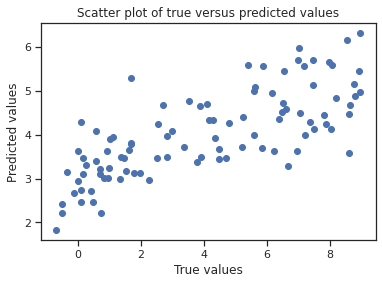

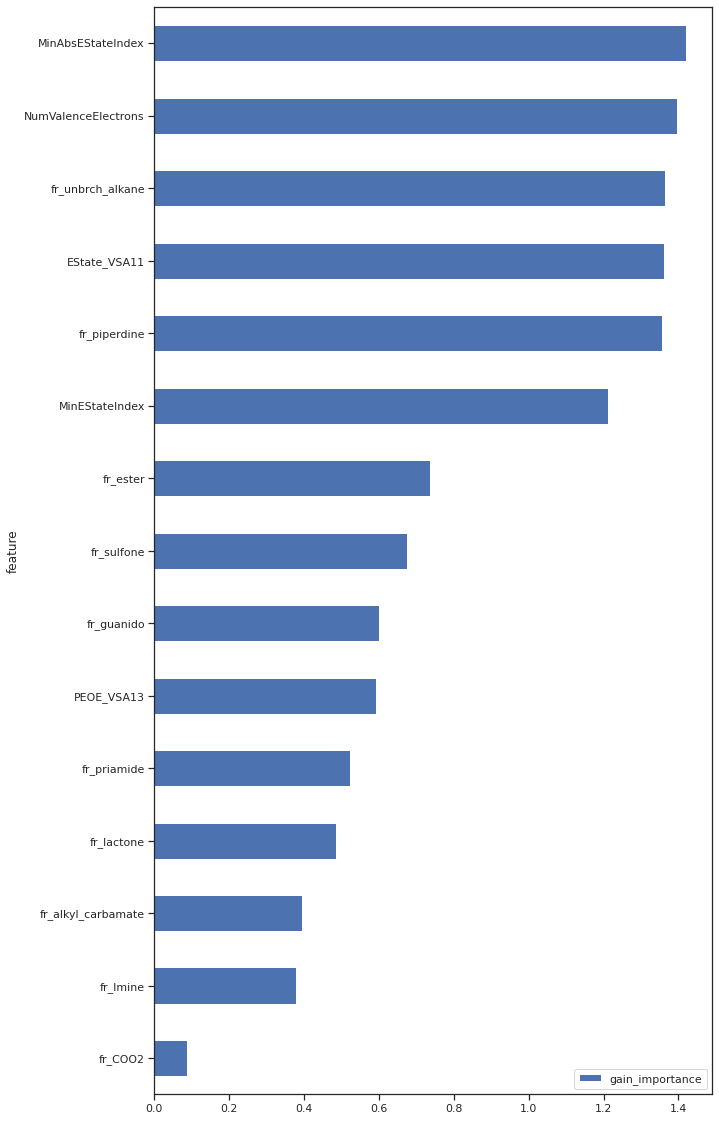

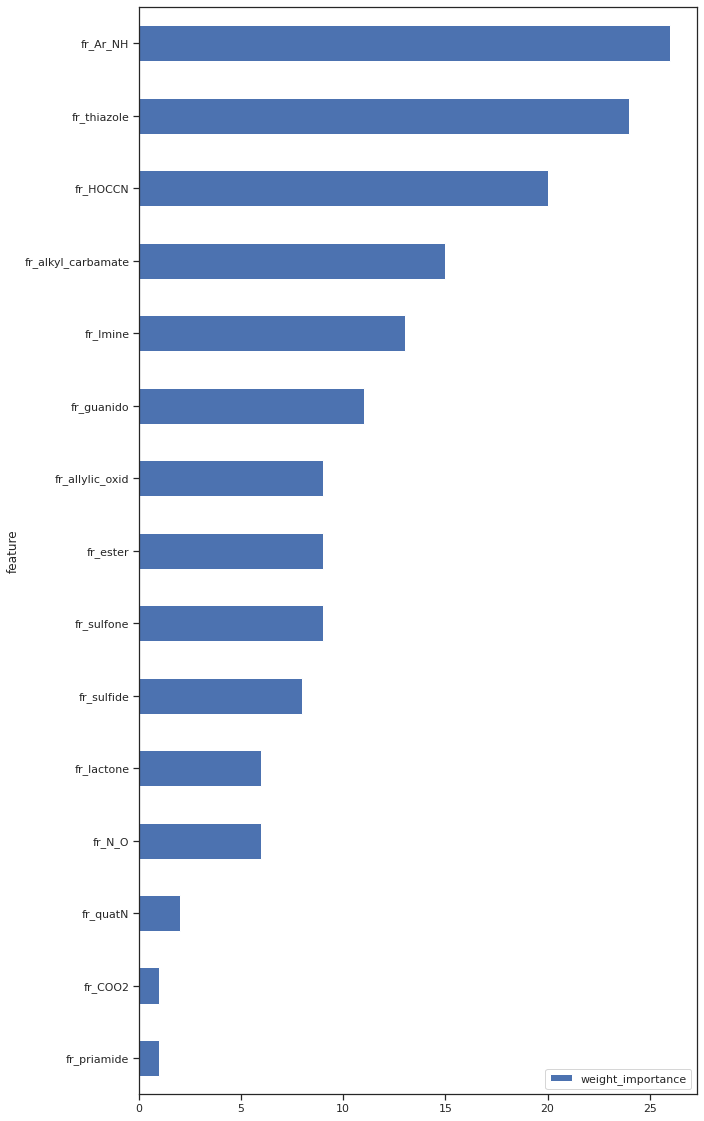

(               feature  gain_importance
 0       MaxEStateIndex         2.509263
 1       MinEStateIndex         1.212546
 2    MinAbsEStateIndex         1.419609
 3                  qed         1.750635
 4                MolWt         1.757027
 ..                 ...              ...
 158         fr_sulfide         2.404536
 159         fr_sulfone         0.673726
 160  fr_term_acetylene        11.708066
 161        fr_thiazole         6.612137
 162   fr_unbrch_alkane         1.364455
 
 [163 rows x 2 columns],
                feature  weight_importance
 0       MaxEStateIndex             9730.0
 1       MinEStateIndex             8299.0
 2    MinAbsEStateIndex             8904.0
 3                  qed             7378.0
 4                MolWt             5547.0
 ..                 ...                ...
 158         fr_sulfide                8.0
 159         fr_sulfone                9.0
 160  fr_term_acetylene              508.0
 161        fr_thiazole               24.0
 162   f

In [60]:
xgb_trainer(df=df,
            feature_col = FEATURES,
            target_col=['log_IC50'],
           test_index=df[df['ID'].str.startswith('646')].index
           )

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(503, 167) (503, 1) (126, 167) (126, 1)
Int64Index([543, 456, 506, 599, 338, 557, 350, 132, 150, 593,
            ...
            310, 435, 398, 162,  79, 531, 335, 221, 294, 618],
           dtype='int64', length=126)
[0]	train-rmse:4.78322	valid-rmse:4.55333
[100]	train-rmse:4.39235	valid-rmse:4.21158
[200]	train-rmse:4.03548	valid-rmse:3.90519
[300]	train-rmse:3.71247	valid-rmse:3.63205
[400]	train-rmse:3.41953	valid-rmse:3.39101
[500]	train-rmse:3.15271	valid-rmse:3.17831
[600]	train-rmse:2.91083	valid-rmse:2.98922
[700]	train-rmse:2.69032	valid-rmse:2.82300
[800]	train-rmse:2.49055	valid-rmse:2.67567
[900]	train-rmse:2.30860	valid-rmse:2.54683
[1000]	train-rmse:2.14271	valid-rmse:2.43276
[1100]	train-rmse:1.99136	valid-rmse:2.33343
[1200]	train-rmse:1.

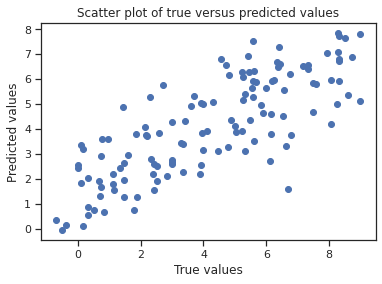

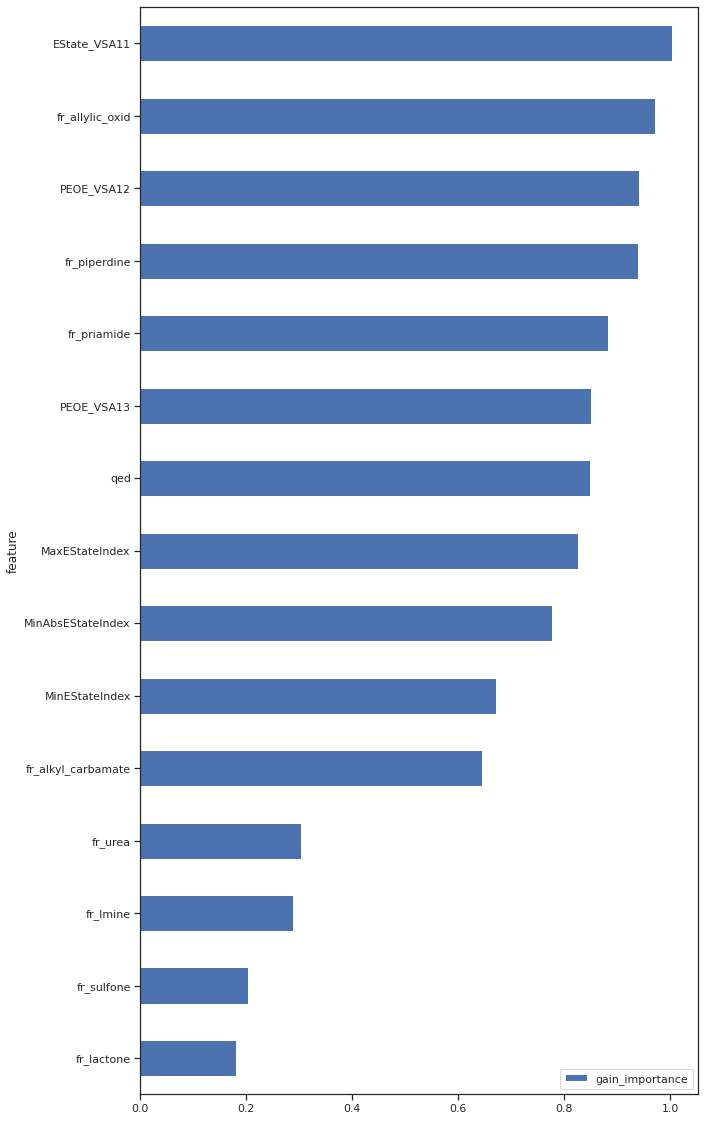

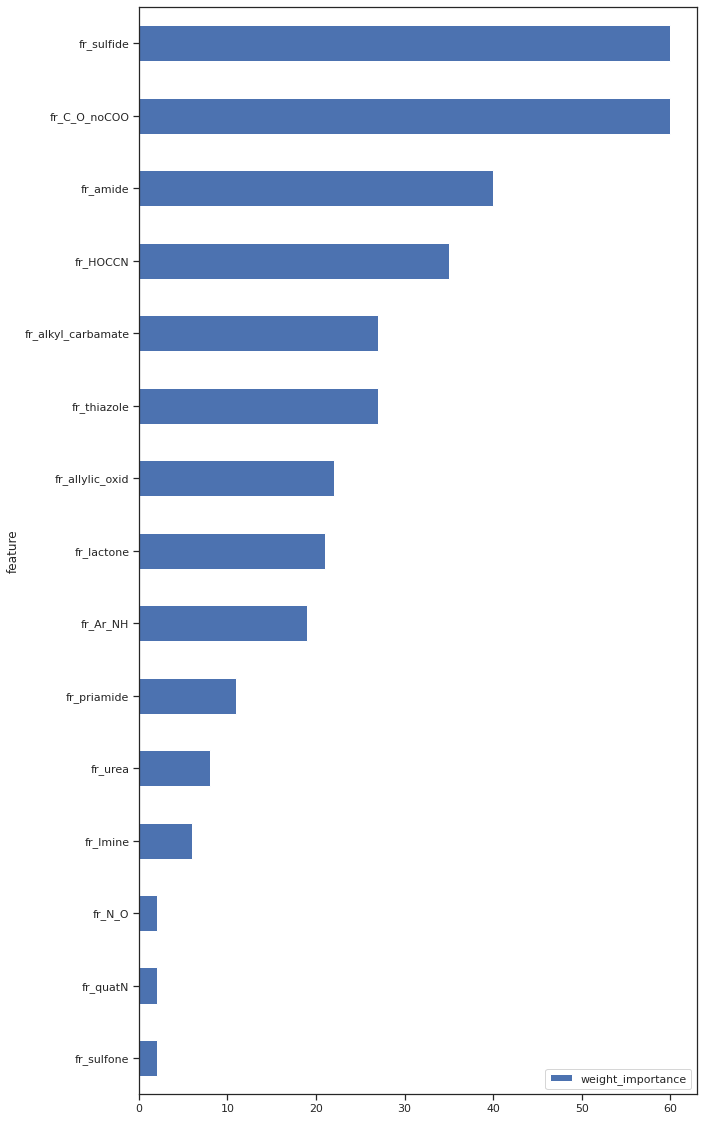

(               feature  gain_importance
 0       MaxEStateIndex         0.825687
 1       MinEStateIndex         0.671613
 2    MinAbsEStateIndex         0.776888
 3                  qed         0.849102
 4                MolWt         1.067525
 ..                 ...              ...
 156         fr_sulfone         0.202539
 157  fr_term_acetylene         8.186619
 158        fr_thiazole         1.650204
 159   fr_unbrch_alkane         1.136676
 160            fr_urea         0.303422
 
 [161 rows x 2 columns],
                feature  weight_importance
 0       MaxEStateIndex            18812.0
 1       MinEStateIndex            15903.0
 2    MinAbsEStateIndex            17125.0
 3                  qed            13931.0
 4                MolWt            11416.0
 ..                 ...                ...
 156         fr_sulfone                2.0
 157  fr_term_acetylene              460.0
 158        fr_thiazole               27.0
 159   fr_unbrch_alkane              188.0
 160    

In [58]:
xgb_trainer(df=df,
            feature_col = FEATURES,
            target_col=['log_IC50'],
           # test_index=df[df['ID'].str.startswith('paper')].index
           )

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(503, 167) (503, 1) (126, 167) (126, 1)
Int64Index([543, 456, 506, 599, 338, 557, 350, 132, 150, 593,
            ...
            310, 435, 398, 162,  79, 531, 335, 221, 294, 618],
           dtype='int64', length=126)
[0]	train-rmse:1937.11822	valid-rmse:1744.73726
[100]	train-rmse:1827.40424	valid-rmse:1690.36600
[200]	train-rmse:1724.54280	valid-rmse:1642.07451
[300]	train-rmse:1630.79200	valid-rmse:1600.56061
[400]	train-rmse:1542.53170	valid-rmse:1565.18819
[500]	train-rmse:1460.21793	valid-rmse:1534.06638
[600]	train-rmse:1382.93357	valid-rmse:1507.07001
[700]	train-rmse:1312.06272	valid-rmse:1483.56524
[800]	train-rmse:1245.23811	valid-rmse:1464.43028
[900]	train-rmse:1183.96418	valid-rmse:1447.30641
[1000]	train-rmse:1125.20571	valid-rmse:1430.55179

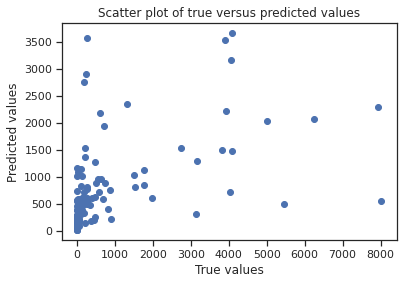

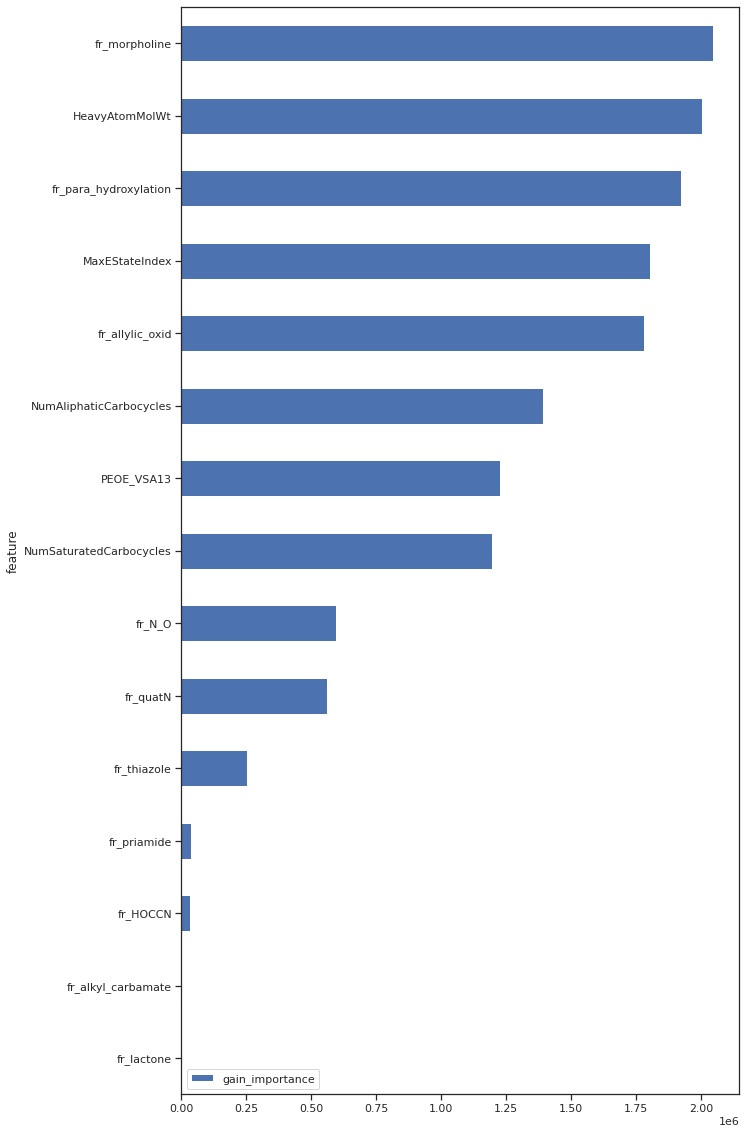

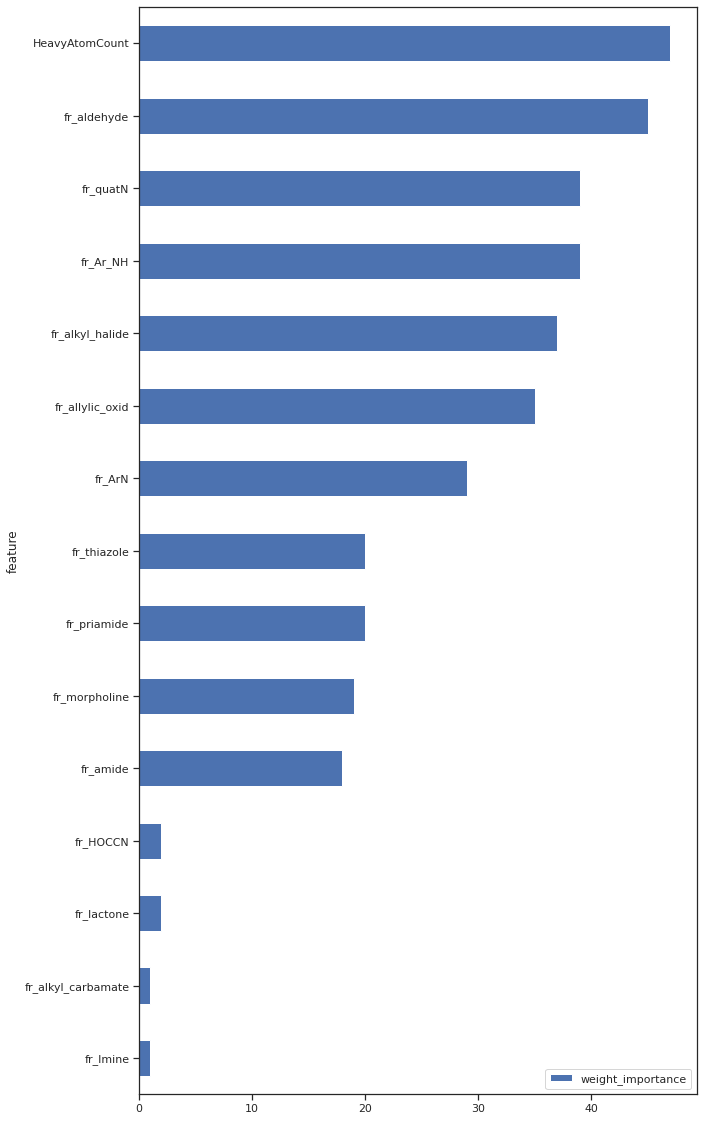

(               feature  gain_importance
 0       MaxEStateIndex     1.804615e+06
 1       MinEStateIndex     2.160096e+06
 2    MinAbsEStateIndex     3.348498e+06
 3                  qed     2.303413e+06
 4                MolWt     2.097892e+06
 ..                 ...              ...
 153        fr_priamide     3.697290e+04
 154        fr_pyridine     5.827660e+06
 155           fr_quatN     5.586743e+05
 156        fr_thiazole     2.523336e+05
 157   fr_unbrch_alkane     3.102192e+06
 
 [158 rows x 2 columns],
                feature  weight_importance
 0       MaxEStateIndex             4469.0
 1       MinEStateIndex             4137.0
 2    MinAbsEStateIndex             4344.0
 3                  qed             3445.0
 4                MolWt             2580.0
 ..                 ...                ...
 153        fr_priamide               20.0
 154        fr_pyridine              222.0
 155           fr_quatN               39.0
 156        fr_thiazole               20.0
 157   f

In [59]:
xgb_trainer(df=df,
            feature_col = FEATURES,
            target_col=['IC50'],
           # test_index=df[df['ID'].str.startswith('paper')].index
           )